In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [85]:
df = pd.read_csv('/content/4193481_268769092_covidhospitalizationsample.csv')
df = df.replace(np.nan,0)
df.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration,Leukocytes,Basophils,Mean corpuscular hemoglobin,Eosinophils,Mean corpuscular volume,Monocytes,Red blood cell distribution width,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus_Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time,Relationship,International normalized ratio,Lactic Dehydrogenase,Prothrombin time_Activity,Vitamin B12,Creatine phosphokinase,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
0,9abc76405794c6d,9,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01d324f278f3101,16,negative,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,-0.624811,0.086074,1.250496,-0.182790,-0.564631,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.356851,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b2fb9312efbadc1,9,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.000000,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,eb5ef46a892698f,0,negative,0,0,0,-0.152590,-0.460932,1.065375,-0.438097,0.472242,3.764100,-1.249524,-0.080696,-1.140144,-1.651331,-0.835508,-1.255906,-1.270772,0.613318,0.000000,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,0.000000,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a713345aef928fa,10,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df.shape

(1230, 111)

In [87]:
df.describe()

,Patient age quantile,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration,Leukocytes,Basophils,Mean corpuscular hemoglobin,Eosinophils,Mean corpuscular volume,Monocytes,Red blood cell distribution width,Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2,Hb saturation,Base excess,pO2,Fio2,Total CO2,pH,HCO3,Rods No,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time,Relationship,International normalized ratio,Lactic Dehydrogenase,Prothrombin time_Activity,Vitamin B12,Creatine phosphokinase,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.0,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.0,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.0,1230.000000,1230.0,1230.000000,1230.0,1230.000000,1230.000000,1230.000000,1230.0,1230.0,1230.000000,1230.000000,1230.000000,1230.000000,1230.0,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,9.426829,0.034146,0.011382,0.010569,0.028552,0.027812,-0.063087,0.014871,0.024377,-0.022549,0.005446,-0.055513,-0.018620,0.003763,-0.043136,0.001923,0.057054,-0.020958,-0.007113,0.0,0.014193,-0.017779,0.016933,0.010018,-0.005546,-0.008648,0.003241,0.003516,0.002422,-0.007750,-0.005385,-0.007920,-0.012086,-0.005397,0.000321,-0.000049,0.000286,0.000150,0.000806,0.0,-0.000645,-0.000032,-0.000512,0.005338,-0.000056,-0.001991,0.003015,0.002805,0.0,-0.001627,0.0,-0.002457,0.0,0.001200,-0.002630,-0.004541,0.0,0.0,-0.002968,0.000078,-0.000740,0.000604,0.0,0.000954,0.002744,-0.004603,-0.000468,0.003627,-0.005051,-0.004727,0.003273,-0.000202,-0.001268,0.003231
std,5.610704,0.181679,0.106121,0.102303,0.352704,0.348870,0.326345,0.383123,0.365767,0.399913,0.348415,0.388749,0.322727,0.372869,0.352363,0.388359,0.458593,0.317271,0.181184,0.0,0.369778,0.242931,0.392799,0.320024,0.321403,0.296658,0.271180,0.308037,0.196807,0.166941,0.165555,0.156562,0.162680,0.091294,0.083560,0.156010,0.195886,0.158590,0.185214,0.0,0.153647,0.173379,0.153682,0.169819,0.144818,0.014123,0.153812,0.175807,0.0,0.109778,0.0,0.026837,0.0,0.090443,0.116141,0.168111,0.0,0.0,0.087945,0.034473,0.121960,0.049354,0.0,0.024192,0.112861,0.061692,0.094367,0.049519,0.116231,0.118215,0.122960,0.101265,0.039044,0.097964
min,0.000000,0.000000,0.000000,0.000000,-2.418559,-2.152643,-2.062515,-1.896609,-1.907856,-1.779779,-3.440245,-1.658539,-1.140144,-5.519430,-0.835508,-5.101581,-2.058669,-1.332725,-1.049182,0.0,-3.339775,-1.407110,-0.535362,-2.010928,-2.283079,-2.371907,-0.641951,-0.704122,-0.465377,-1.093174,-1.169722,-0.771034,-0.837220,-1.269278,-1.102373,-1.639652,-2.295574,-2.904936,-1.633925,0.0,-2.598133,-3.055140,-2.645090,-0.624373,-2.264253,-0.102062,-0.315965,-0.233126,0.0,-1.615596,0.0,-0.202297,0.0,-1

In [88]:
df.groupby(['SARS-Cov-2 exam result']).count()

,Patient ID,Patient age quantile,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration,Leukocytes,Basophils,Mean corpuscular hemoglobin,Eosinophils,Mean corpuscular volume,Monocytes,Red blood cell distribution width,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus_Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time,Relationship,International normalized ratio,Lactic Dehydrogenase,Prothrombin time_Activity,Vitamin B12,Creatine phosphokinase,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,...,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672
positive,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,...,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558


In [0]:
labels = df['SARS-Cov-2 exam result']
features = df.drop(columns=['SARS-Cov-2 exam result'])

In [90]:
labels[0:5]

0    negative
1    negative
2    negative
3    negative
4    negative
Name: SARS-Cov-2 exam result, dtype: object

In [91]:
features[0:5]

,Patient ID,Patient age quantile,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration,Leukocytes,Basophils,Mean corpuscular hemoglobin,Eosinophils,Mean corpuscular volume,Monocytes,Red blood cell distribution width,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus_Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time,Relationship,International normalized ratio,Lactic Dehydrogenase,Prothrombin time_Activity,Vitamin B12,Creatine phosphokinase,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
0,9abc76405794c6d,9,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01d324f278f3101,16,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,-0.624811,0.086074,1.250496,-0.182790,-0.564631,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.356851,0.0,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b2fb9312efbadc1,9,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,eb5ef46a892698f,0,0,0,0,-0.152590,-0.460932,1.065375,-0.438097,0.472242,3.764100,-1.249524,-0.080696,-1.140144,-1.651331,-0.835508,-1.255906,-1.270772,0.613318,0.000000,not_detected,not_detected,detected,not_detected,not_detected,not_detected,0.0,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a713345aef928fa,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,...,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
labels.replace('positive',0, inplace=True)
labels.replace('negative',1, inplace=True)
labels[0:5]

0    1
1    1
2    1
3    1
4    1
Name: SARS-Cov-2 exam result, dtype: int64

In [93]:
features = pd.get_dummies(features)
features[0:5]

,Patient age quantile,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration,Leukocytes,Basophils,Mean corpuscular hemoglobin,Eosinophils,Mean corpuscular volume,Monocytes,Red blood cell distribution width,Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2,Hb saturation,Base excess,pO2,Fio2,...,Urine - Ketone Bodies_0,Urine - Ketone Bodies_absent,Urine - Ketone Bodies_not_done,Urine - Nitrite_0,Urine - Nitrite_not_done,Urine - Urobilinogen_0,Urine - Urobilinogen_normal,Urine - Urobilinogen_not_done,Urine - Protein_0,Urine - Protein_absent,Urine - Protein_not_done,Urine - Leukocytes_0,Urine - Leukocytes_10000,Urine - Leukocytes_10600,Urine - Leukocytes_16000,Urine - Leukocytes_2000,Urine - Leukocytes_22000,Urine - Leukocytes_3000,Urine - Leukocytes_32000,Urine - Leukocytes_38000,Urine - Leukocytes_4000,Urine - Leukocytes_43000,Urine - Leukocytes_5000,Urine - Leukocytes_5942000,Urine - Leukocytes_7000,Urine - Leukocytes_77000,Urine - Leukocytes_<1000,Urine - Crystals_0,Urine - Crystals_Ausentes,Urine - Crystals_Urato Amorfo --+,Urine - Hyaline cylinders_0,Urine - Hyaline cylinders_absent,Urine - Granular cylinders_0,Urine - Granular cylinders_absent,Urine - Yeasts_0,Urine - Yeasts_absent,Urine - Color_0,Urine - Color_light_yellow,Urine - Color_orange,Urine - Color_yellow
0,9,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
1,16,0,0,0,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,-0.624811,0.086074,1.250496,-0.182790,-0.564631,0.0,-0.356851,0.0,-0.316791,0.194574,2.412989,0.862512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
2,9,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
3,0,0,0,0,-0.152590,-0.460932,1.065375,-0.438097,0.472242,3.764100,-1.249524,-0.080696,-1.140144,-1.651331,-0.835508,-1.255906,-1.270772,0.613318,0.000000,0.0,0.000000,0.0,-0.342622,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
4,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0


In [0]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.2)
features_train,features_validation,labels_train,labels_validation = train_test_split(features_train,labels_train,test_size=0.2)


In [0]:
model = keras.Sequential([keras.layers.Dense(32,input_shape=(0,1404)),keras.layers.Dense(20,activation=tf.nn.relu),
                          keras.layers.Dense(2,activation='softmax')])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [144]:
history = model.fit(features_train,labels_train,epochs=20,validation_data=(features_validation,labels_validation))

Epoch 1/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6646 - acc: 0.6074 - val_loss: 0.6063 - val_acc: 0.6802
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6070 - acc: 0.6773 - val_loss: 0.5810 - val_acc: 0.7005
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5675 - acc: 0.7166 - val_loss: 0.5613 - val_acc: 0.7208
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5381 - acc: 0.7395 - val_loss: 0.5442 - val_acc: 0.7157
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4937 - acc: 0.7853 - val_loss: 0.5407 - val_acc: 0.7157
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4456 - acc: 0.7891 - val_loss: 0.5338 - val_acc: 0.7360
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4020 - acc: 0.8501 - val_loss: 0.5406 - val_acc: 0.7360
Epoch 8/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3417 - acc: 0.8

In [145]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test,labels_test)
print(performance)

8/8 [==============================] - 0s 2ms/step - loss: 0.6596 - acc: 0.6301
[0.6596049666404724, 0.630081295967102]


Instructions for updating:
Please use `model.predict()` instead.


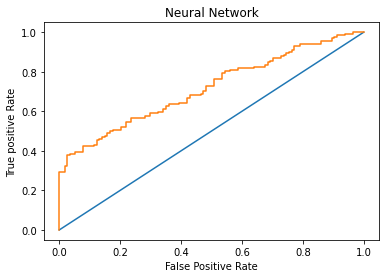

In [181]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold = roc_curve(labels_test, model.predict_proba(features_test)[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2,label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Neural Network')
plt.show()


In [122]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

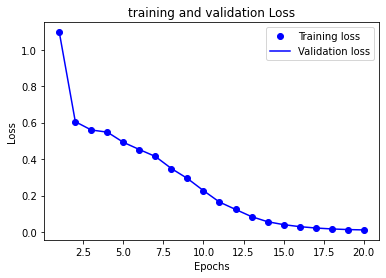

In [123]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')

plt.plot(epochs,loss,'b',label='Validation loss')

plt.title('training and validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [0]:
# Tuning Hyperparameters
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def create_model(init_mode='uniform'):
    # define model
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, kernel_initializer=init_mode,input_dim=1404)) 
    # model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(keras.layers.Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    # model.compile(loss='categorical_crossentropy',
    #           optimizer=keras.optimizers.RMSprop(),
    #           metrics=['accuracy'])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
    return model

In [153]:
%%time
seed = 7
np.random.seed(seed)
batch_size = 128
epochs = 30

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(features_train, labels_train)

Epoch 1/30
7/7 [==============================] - 0s 3ms/step - loss: 1.9384 - acc: 0.3342
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8537 - acc: 0.5883
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6565 - acc: 0.6341
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5976 - acc: 0.6976
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5684 - acc: 0.7319
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5444 - acc: 0.7268
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5227 - acc: 0.7662
Epoch 8/30
7/7 [==============================] - 0s 4ms/step - loss: 0.4942 - acc: 0.7827
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4709 - acc: 0.8132
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4507 - acc: 0.8196
Epoch 11/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4282 - acc: 0.86

In [160]:
grid_result.best_params_
grid_result.best_score_

0.7013322512308756

2/2 [==============================] - 0s 3ms/step


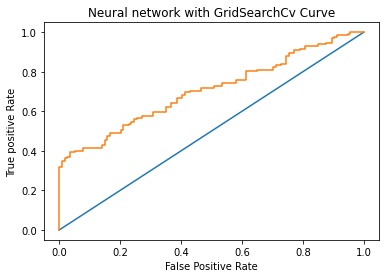

In [182]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold = roc_curve(labels_test, grid.predict_proba(features_test)[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2,label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Neural network with GridSearchCv Curve')
plt.show()


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
param_grid = {'max_depth':np.arange(1,50)}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid,cv=5)
tree_cv.fit(features_train,labels_train)
tree_cv.best_params_
tree_cv.best_score_

0.7216802386519391

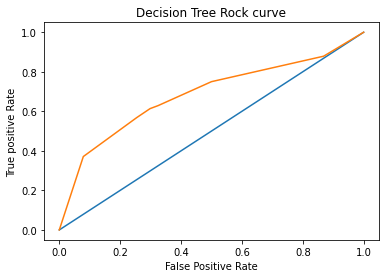

In [179]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold = roc_curve(labels_test, tree_cv.predict_proba(features_test)[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2,label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Rock curve')
plt.show()
